# Your info

Full name: Sara Kodeiri

Student ID: 96521443

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def BMU(vector, map):
    res = (0, 0)
    dist = np.sum((map[0][0] - vector) ** 2)
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
          temp = np.sum((map[i][j] - vector) ** 2)
          if temp < dist:
              dist = temp
              res = (i, j)
    return res

def update_map(min_x, min_y, vector, map, radius, alpha):
  for i in range(map.shape[0]):
    for j in range(map.shape[1]):
      dist = np.sqrt((min_x - i)**2 + (min_y - j)**2)
      if dist < radius:
        influence = np.exp(-dist / (2 * (radius ** 2)))
        map[i][j] += influence * alpha * (vector - map[i][j])
  return map

def train(input, dim, part):
  alpha_0 = 0.1
  radius_0 = dim // 3
  epochs = dim * dim * 4
  sig = epochs / np.log(radius_0)
  map = np.random.uniform(0, 1, size=(dim, dim, 3))

  for epoch in range(epochs):
    if part == "A":
      radius = radius_0
      alpha = alpha_0

    elif part == "B":
      radius = radius_0
      alpha = alpha_0 * np.exp(-epoch / sig)

    elif part == "C":
      radius = radius_0 * np.exp(-epoch / sig)
      alpha = alpha_0 * np.exp(-epoch / sig)

    vector = input[epoch % (dim ** 2)]
    min_x, min_y = BMU(vector, map)
    map = update_map(min_x, min_y, vector, map, radius, alpha)
  
  return map


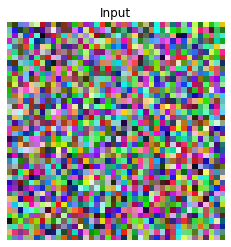

In [32]:
dim = 40
input = np.ndarray((dim ** 2, 3), dtype=float)
for i in range(len(input)):
    input[i] = [np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)]

input -= input.min()
input = input / input.max()

plt.title("Input")
plt.axis('off')
plt.imshow(np.reshape(input, (dim,dim,3)))
plt.show()


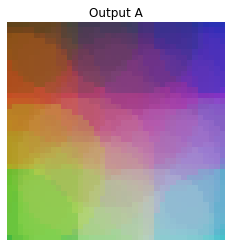

In [33]:
map_a = train(input, dim, "A")
plt.title("Output A")
plt.axis('off')
plt.imshow(np.reshape(map_a, (dim,dim,3)))
plt.show()

# Q1.B. Kohonen

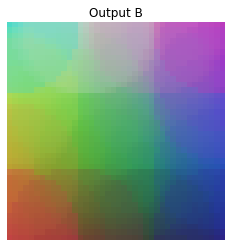

In [34]:
#write your code here
map_b = train(input, dim, "B")
plt.title("Output B")
plt.axis('off')
plt.imshow(np.reshape(map_b, (dim,dim,3)))
plt.show()

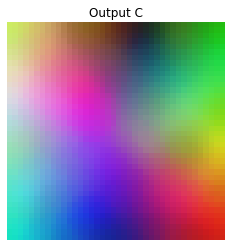

In [35]:
map_c = train(input, dim, "C")
plt.title("Output C")
plt.axis('off')
plt.imshow(np.reshape(map_c, (dim,dim,3)))
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title("Input")
plt.axis('off')
plt.imshow(np.reshape(input, (dim,dim,3)))
plt.subplot(1, 4, 2)
plt.title("Part A")
plt.axis('off')
plt.imshow(np.reshape(map_a, (dim,dim,3)))
plt.subplot(1, 4, 3)
plt.title("Part B")
plt.axis('off')
plt.imshow(np.reshape(map_b, (dim,dim,3)))
plt.subplot(1, 4, 4)
plt.title("Part C")
plt.axis('off')
plt.imshow(np.reshape(map_c, (dim,dim,3)))
plt.tight_layout()
plt.savefig("Q1.png")



# Q2.A. MLP

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
#write your code here
x_train = np.random.uniform(low = -50, high = 50, size=5000)
# x_train.sort()
y_train = np.sin(x_train)

x_test = np.random.uniform(low = -4, high = 4, size=400)
x_test.sort()
y_test = np.sin(x_test)


In [39]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=800, batch_size=200)
prediction = model.predict(x_test)

Epoch 1/800
25/25 [==============================] - 0s 2ms/step - loss: 1.6063
Epoch 2/800
25/25 [==============================] - 0s 2ms/step - loss: 0.5138
Epoch 3/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4960
Epoch 4/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4947
Epoch 5/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4959
Epoch 6/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4922
Epoch 7/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4858
Epoch 8/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4878
Epoch 9/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4863
Epoch 10/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4746
Epoch 11/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4718
Epoch 12/800
25/25 [==============================] - 0s 2ms/step - loss: 0.4719
Epoch 13/800
25/25 [=================

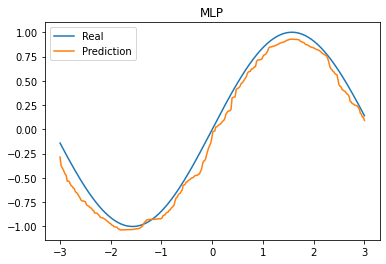

In [40]:
x = np.linspace(-3, 3, 300)
flat = list(np.concatenate(prediction).flat)
flat = flat[50:350]
plt.title("MLP")
plt.plot(x, np.sin(x))
plt.plot(x, flat)
plt.legend(['Real', 'Prediction'])

plt.show()

# Q2.B. RBF

In [41]:
#write your code here

In [42]:
x = np.linspace(-3, 3, 300)
r_flat = list(np.concatenate(r_prediction).flat)
r_flat = r_flat[50:350]
plt.title("RBF")
plt.plot(x, np.sin(x))
plt.plot(x, r_flat)
plt.legend(['Real', 'Prediction'])

plt.show()

NameError: ignored

# Q2.C. Compare

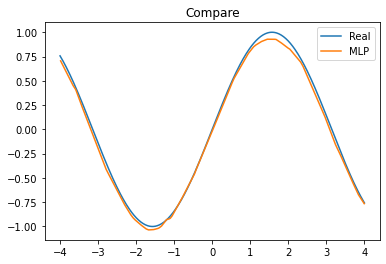

In [43]:
#write your code here
x = np.linspace(-4, 4, 400)
plt.title("Compare")
plt.plot(x, np.sin(x))
plt.plot(x_test, prediction)
# plt.plot(x, r_prediction)
plt.legend(['Real','MLP', 'RBF'])

plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.